<img src="notebook_images\lightkurve_logo.png"/>

# Table of Contents
* [Standard Package and Notebook Stuff](#Standard-Package-and-Notebook-Stuff)
* [Enter the TIC ID of your Object](#Enter-the-TIC-ID-of-your-Object)
* [Making the Light Curve](#Making-the-Light-Curve)
    * [Download the Light Curve File](#Download-the-Light-Curve-File)
    * [Plot the Full Light Curve](#Plot-the-Full-Light-Curve)
        * [Make a Periodogram from the Full Light Curve and Find the Periodicity](#Make-a-Periodogram-from-the-Full-Light-Curve-and-Find-the-Periodicity)
    * [Plot a Folded Light Curve](#Plot-a-Folded-Light-Curve)
        * [Bin the Folded Light Curve and Plot the Binned Light Curve](#Bin-the-Folded-Light-Curve-and-Plot-the-Binned-Light-Curve)
    * [Send the Full Light Curve to a Data Frame](#Send-the-Full-Light-Curve-to-a-Data-Frame)
        * [Create a .txt File with the Full Light Curve's Values](#Create-a-.txt-File-with-the-Full-Light-Curve's-Values)
        * [Assign Data Frame Values to Variables for External Analysis](#Assign-Data-Frame-Values-to-Variables-for-External-Analysis)
            * [Normalize the Full Light Curve's Flux](#Normalize-the-Full-Light-Curve's-Flux)
    
        

# Standard Package and Notebook Stuff

In [1]:
from lightkurve import search_lightcurvefile
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
%matplotlib notebook

# Enter the TIC (TESS Input Catalog) ID of your Object

In [11]:
TIC_ID = 5051080 #this is a new hot subdwarf system found in TESS by HPU students

# *Making the Light Curve*

## Download the Light Curve File

In [12]:
lcf = search_lightcurvefile(TIC_ID, mission='TESS').download()

## Plot the Full Light Curve

<IPython.core.display.Javascript object>


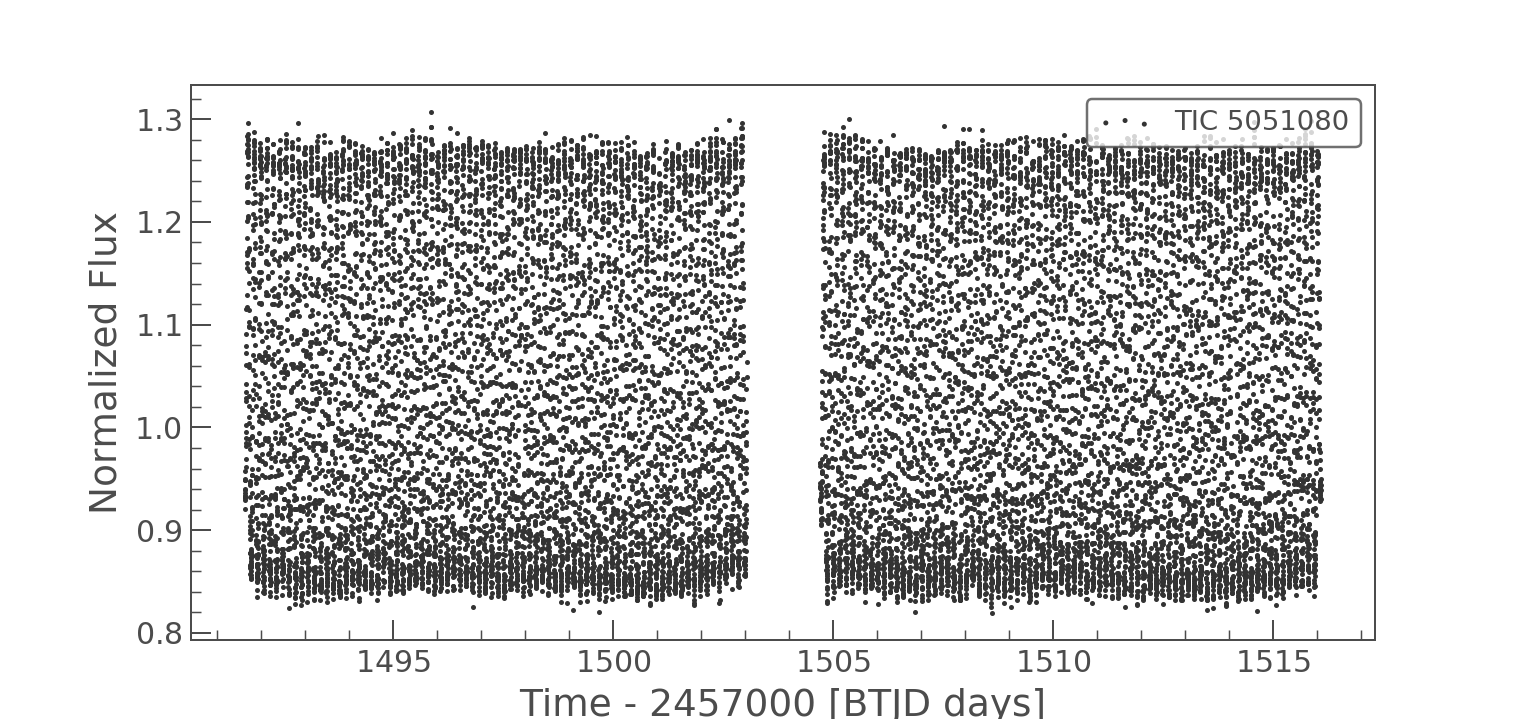

In [13]:
lc = lcf.PDCSAP_FLUX.remove_nans().remove_outliers()
lc.scatter()

### Make a Periodogram from the Full Light Curve and Find the Periodicity

<IPython.core.display.Javascript object>


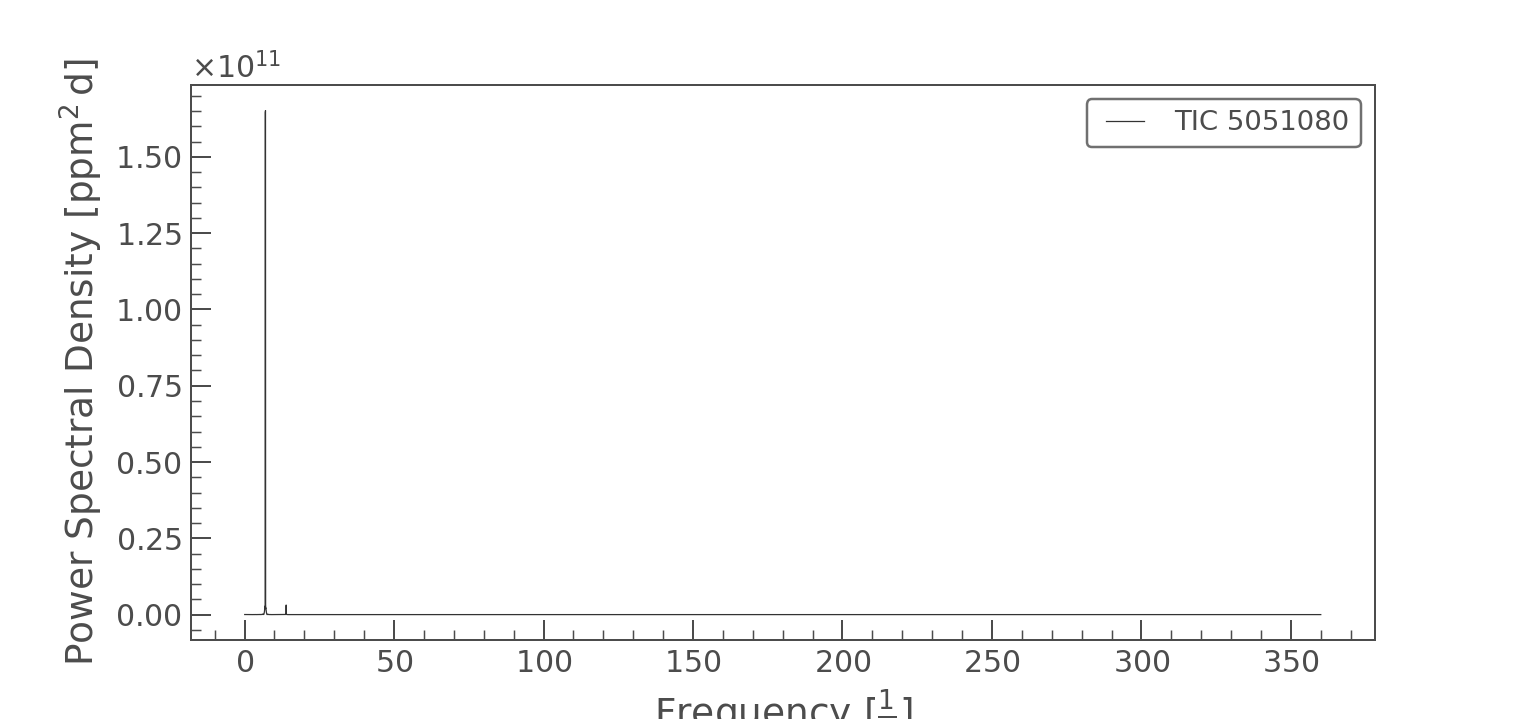

P = 0.14384734748414302 days
P = 3.4523363396194324 hours


In [14]:
pg = lc.to_periodogram()
pg.smooth().plot()
P = np.float64(pg.period_at_max_power)
print('P =', P,'days')
print('P =', P*24,'hours')

## Plot a Folded Light Curve

<IPython.core.display.Javascript object>


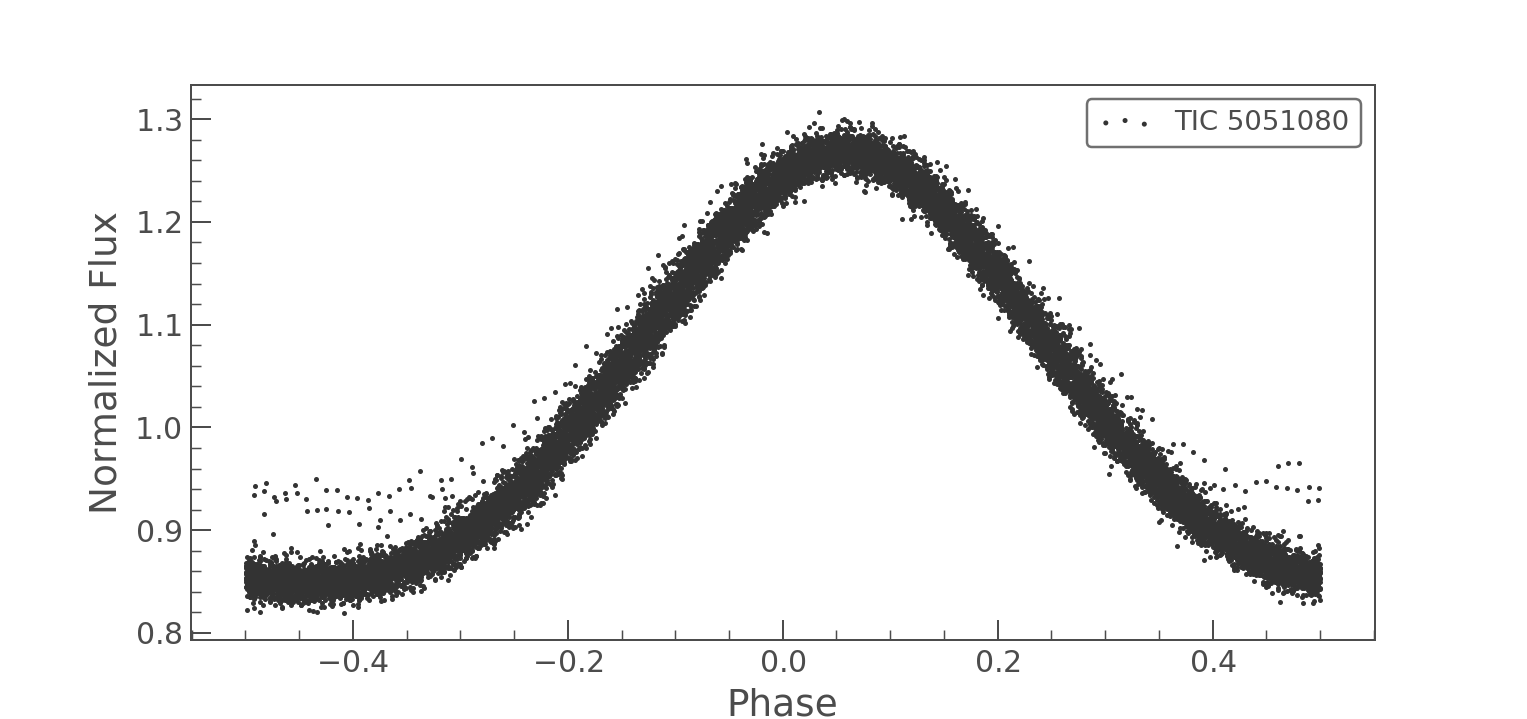

In [25]:
folded_lc = lc.fold(P)
folded_lc.scatter()

### Bin the Folded Light Curve and Plot the Binned Light Curve

<IPython.core.display.Javascript object>


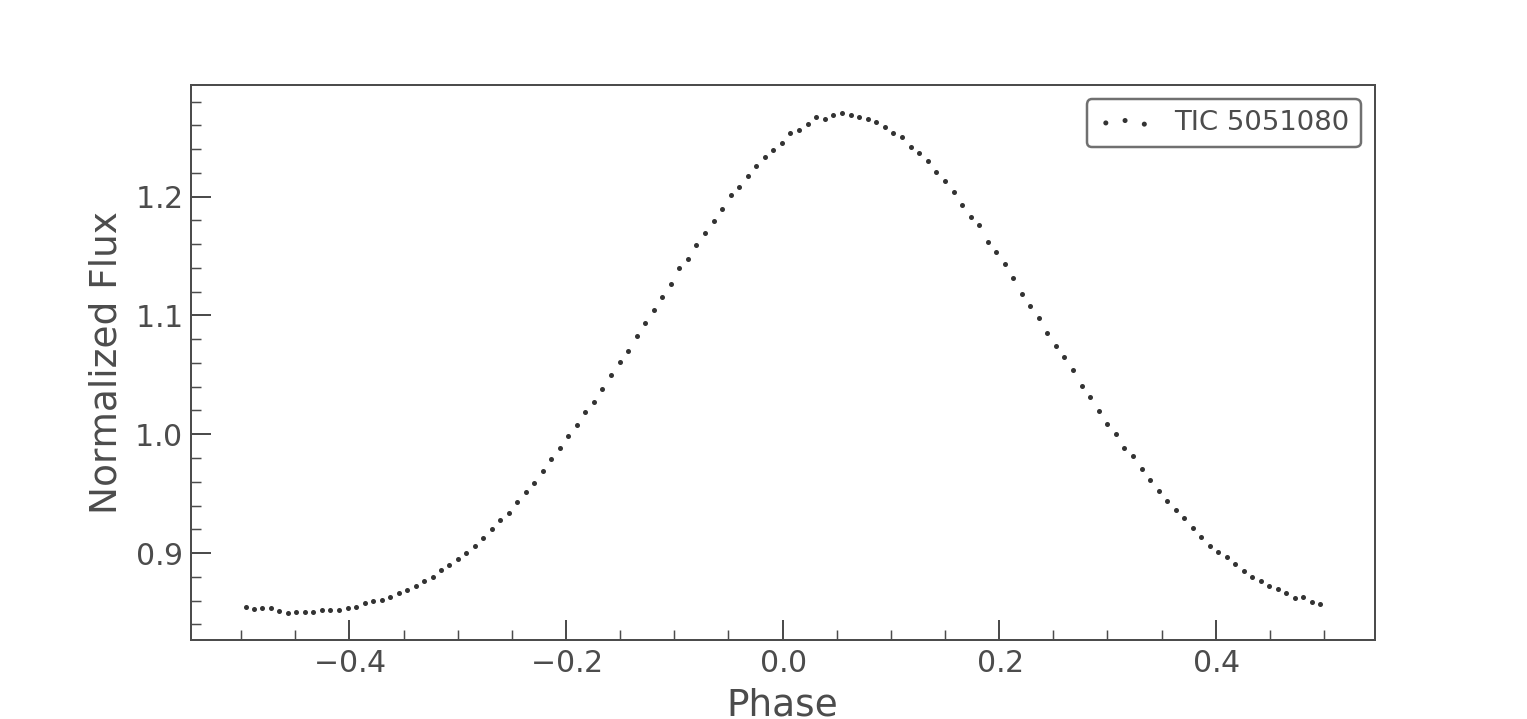

In [16]:
binned_lc = folded_lc.bin(binsize=np.sqrt(len(lc.time)))
binned_lc.scatter()
plt.savefig(f'{TIC_ID}_lc.png',dpi=500,bbox_inches='tight')

## Send the Full Light Curve to a Data Frame

In [26]:
dc = lc.to_table()
dc

time,flux,flux_err
float64,float32,float32
1491.6358995051073,1392.489,11.270135
1491.6372884148386,1419.9167,11.29866
1491.638677324569,1410.5986,11.275457
1491.6400662338333,1408.8558,11.272453
1491.6414551435646,1404.9042,11.273074
1491.6428440532957,1416.1223,11.296584
1491.6442329630254,1412.0204,11.283282
1491.645621872756,1421.1805,11.284378
1491.647010782487,1434.9789,11.288915


### Create a .txt File with the Full Light Curve's Values

In [ ]:
tic_table = pd.DataFrame(data={'Time':dc['time'],'flux':dc['flux'],'flux_err':dc['flux_err']})
tic_table.to_csv(f'{TIC_ID}.txt',sep=' ',index=False)

### Assign Data Frame Values to Variables for External Analysis

In [27]:
time = dc['time']
flux = dc['flux']

#### Normalize the Full Light Curve's Flux
From here you can continue on with your own analysis of the light curve with full control of the data should you desire to.

In [ ]:
flux = flux/np.median(flux)
flux_err = dc['flux_err']
flux_err = flux_err/np.median(flux_err)